In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
# Loading  data
df = pd.read_csv('UCI_Credit_Card_balanced.csv')

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [4]:
scaler = StandardScaler()

In [5]:
scaler.fit(df.drop('Y',axis=1))

StandardScaler()

In [6]:
scaled_features = scaler.fit_transform(df.drop('Y',axis=1))

In [7]:
X = pd.DataFrame(scaled_features,columns=df.columns[:-1])
y = df['Y']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

In [9]:
from sklearn.svm import SVC

In [10]:
svm = SVC(C=1, gamma=0.1, kernel='rbf')

In [11]:
from sklearn.metrics import plot_confusion_matrix, cohen_kappa_score, plot_roc_curve, classification_report
import shap

In [12]:
t0 = datetime.now()
svm.fit(X_train,y_train)
t1 = datetime.now()
print("Training Time: ", (t1 - t0))

Training Time:  0:01:58.545042


In [13]:
predictions = svm.predict(X_test)

<Figure size 504x360 with 0 Axes>

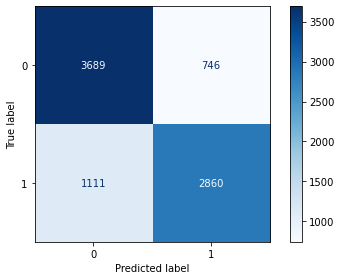

In [14]:
plt.figure(figsize=(7, 5))
ax = plot_confusion_matrix(svm, X_test, y_test, cmap=plt.cm.Blues)

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\svm_conf.png')
plt.show()

<Figure size 504x360 with 0 Axes>

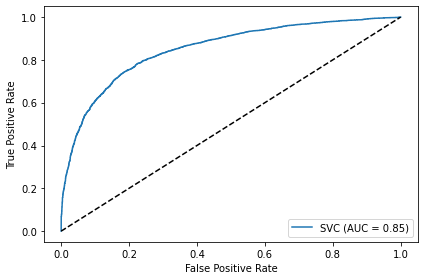

In [15]:
plt.figure(figsize=(7, 5))
ax = plot_roc_curve(svm, X_test, y_test)
x = np.linspace(0, 1, 100)
ax = plt.plot(x, x, linestyle='--',color='black')

plt.tight_layout()
plt.savefig(r'C:\Users\alanw\OneDrive\Varsity\Research\Paper Itself\LaTeX\images\svm_roc.png')
plt.show()

In [16]:
kappa = cohen_kappa_score(y_test, predictions)
print("Cohen's Kappa: %.2f" % (kappa))

Cohen's Kappa: 0.55
